## PROCEDURE

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import calendar
import csv


from matplotlib import gridspec
from collections import OrderedDict
from sklearn.linear_model import Lasso
from matplotlib.pyplot import xticks
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# COVID DAILY CASES

* Cleaning of the dataset COVID-19 from DGE

In [3]:
data = pd.DataFrame(pd.read_csv('210523COVID19MEXICO.csv'))
data.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-05-23,z482b8,1,12,9,2,9,9,12,1,2020-10-16,2020-10-16,9999-99-99,97,2,41,1,97,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,1,99,México,97,97
1,2021-05-23,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,97,2,97,2,99,México,97,1
2,2021-05-23,z23d9d,1,12,22,2,24,22,9,1,2021-01-05,2021-01-05,9999-99-99,97,2,29,1,97,2,2,2,2,2,2,2,2,2,98,2,2,2,2,97,2,97,6,99,México,97,97
3,2021-05-23,z24953,1,12,9,1,9,9,10,1,2020-10-15,2020-10-15,9999-99-99,97,2,40,1,98,99,99,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,México,97,97
4,2021-05-23,zz8e77,1,12,9,2,9,9,2,1,2020-04-16,2020-04-10,9999-99-99,97,2,34,1,97,2,2,2,1,1,2,2,2,2,2,2,2,2,2,97,2,97,6,99,México,97,97


In [4]:
#Duplicated ID
sum(data.duplicated(subset = 'ID_REGISTRO')) == 0

True

In [5]:
data.shape

(6943110, 40)

In [6]:
round(100*(data.isnull().sum()/len(data.index)), 2)

FECHA_ACTUALIZACION      0.0
ID_REGISTRO              0.0
ORIGEN                   0.0
SECTOR                   0.0
ENTIDAD_UM               0.0
SEXO                     0.0
ENTIDAD_NAC              0.0
ENTIDAD_RES              0.0
MUNICIPIO_RES            0.0
TIPO_PACIENTE            0.0
FECHA_INGRESO            0.0
FECHA_SINTOMAS           0.0
FECHA_DEF                0.0
INTUBADO                 0.0
NEUMONIA                 0.0
EDAD                     0.0
NACIONALIDAD             0.0
EMBARAZO                 0.0
HABLA_LENGUA_INDIG       0.0
INDIGENA                 0.0
DIABETES                 0.0
EPOC                     0.0
ASMA                     0.0
INMUSUPR                 0.0
HIPERTENSION             0.0
OTRA_COM                 0.0
CARDIOVASCULAR           0.0
OBESIDAD                 0.0
RENAL_CRONICA            0.0
TABAQUISMO               0.0
OTRO_CASO                0.0
TOMA_MUESTRA_LAB         0.0
RESULTADO_LAB            0.0
TOMA_MUESTRA_ANTIGENO    0.0
RESULTADO_ANTI

In [7]:
# Picking a Mexican state

entidadres = data.loc[(data['ENTIDAD_RES'] == 13) | (data['ENTIDAD_UM'] == 13)]

#                      | (data['ENTIDAD_RES'] == 3) | (data['ENTIDAD_RES'] == 6)
#                      | (data['ENTIDAD_RES'] == 9) | (data['ENTIDAD_RES'] == 15)
#                      | (data['ENTIDAD_RES'] == 17) | (data['ENTIDAD_RES'] == 19)]
#                      | (data['ENTIDAD_RES'] == 21) | (data['ENTIDAD_RES'] == 22)
#                      | (data['ENTIDAD_RES'] == 29) | (data['ENTIDAD_RES'] == 26)
#                      | (data['ENTIDAD_RES'] == 30)]

entidadres.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
51,2021-05-23,z53e08,1,12,13,2,28,13,48,1,2020-04-28,2020-04-24,9999-99-99,97,2,39,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,México,97,97
155,2021-05-23,0aefba,1,12,13,1,13,13,48,1,2020-05-21,2020-05-18,9999-99-99,97,99,37,1,2,2,2,2,2,2,2,2,2,2,2,2,2,99,1,1,2,97,3,99,México,97,97
165,2021-05-23,0dbfb5,1,12,13,1,30,13,29,1,2020-07-29,2020-07-29,9999-99-99,97,2,27,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97
171,2021-05-23,136408,1,12,13,2,13,13,48,1,2020-09-01,2020-08-28,9999-99-99,97,2,28,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,97,3,99,México,97,97
182,2021-05-23,076b8c,1,8,13,1,14,13,76,1,2020-05-22,2020-05-21,9999-99-99,97,2,78,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,6,99,México,97,97


In [8]:
#Selecting important variables

#entidadresBc = entidadresBc[['EDAD','SEXO','FECHA_INGRESO']]
                             #'FECHA_SINTOMAS','ENTIDAD_RES','MUNICIPIO_RES','UCI','CLASIFICACION_FINAL']]
entidadres = entidadres[['EDAD','SEXO','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','ENTIDAD_RES','MUNICIPIO_RES','TIPO_PACIENTE', 'NEUMONIA','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
             'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO','UCI','CLASIFICACION_FINAL']]
entidadres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL
51,39,2,2020-04-28,2020-04-24,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,7
155,37,1,2020-05-21,2020-05-18,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,99,97,3
165,27,1,2020-07-29,2020-07-29,9999-99-99,13,29,1,2,2,2,2,1,2,2,2,2,2,2,2,97,7
171,28,2,2020-09-01,2020-08-28,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,3
182,78,1,2020-05-22,2020-05-21,9999-99-99,13,76,1,2,2,2,2,2,2,2,2,2,2,2,1,97,6


In [9]:
entidadres.shape

(82736, 22)

In [10]:
#entidadresBc.to_csv('C:/Users/almej/Desktop/EntidadBaja.csv')
#entidadres.to_csv('EntidadesCovid.csv')

# AGEB

* Cleaning the AGEEML dataset from INEGI 

In [11]:
entidades = pd.DataFrame(pd.read_csv('AGEEML_20201211021224.csv'))
entidades.head(5) 

,Mapa,Cve_Ent,Nom_Ent,Nom_Abr,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Ãmbito,Latitud,Longitud,Lat_Decimal,Lon_Decimal,Altitud,Cve_Carta,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,10010001,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,U,"21Â°52Â´47.362N""","102Â°17Â´45.768W""",21.879823,-102.296047,1878,F13D19,722250,348722,373528,185120
1,10010094,1,Aguascalientes,Ags.,1,Aguascalientes,94,Granja Adelita,R,"21Â°52Â´18.749N""","102Â°22Â´24.710W""",21.871875,-102.373531,1902,F13D18,14,*,*,2
2,10010096,1,Aguascalientes,Ags.,1,Aguascalientes,96,Agua Azul,R,"21Â°53Â´01.522N""","102Â°21Â´25.639W""",21.883756,-102.357122,1861,F13D18,37,21,16,11
3,10010100,1,Aguascalientes,Ags.,1,Aguascalientes,100,Rancho Alegre,R,"21Â°51Â´16.556N""","102Â°22Â´21.884W""",21.854599,-102.372746,1879,F13D18,10,*,*,1
4,10010102,1,Aguascalientes,Ags.,1,Aguascalientes,102,Los Arbolitos [Rancho],R,"21Â°46Â´48.650N""","102Â°21Â´26.261W""",21.780181,-102.357295,1861,F13D18,7,*,*,1


In [12]:
#Duplicated ID
sum(entidades.duplicated(subset = 'Mapa')) == 0

True

In [13]:
round(100*(entidades.isnull().sum()/len(entidades.index)), 2)

Mapa                            0.0
Cve_Ent                         0.0
Nom_Ent                         0.0
Nom_Abr                         0.0
Cve_Mun                         0.0
Nom_Mun                         0.0
Cve_Loc                         0.0
Nom_Loc                         0.0
Ãmbito                         0.0
Latitud                         0.0
Longitud                        0.0
Lat_Decimal                     0.0
Lon_Decimal                     0.0
Altitud                         0.0
Cve_Carta                       0.0
Pob_Total                       0.0
Pob_Masculina                   0.0
Pob_Femenina                    0.0
Total De Viviendas Habitadas    0.0
dtype: float64

In [14]:
entidades[entidades['Mapa'].duplicated() == True]

,Mapa,Cve_Ent,Nom_Ent,Nom_Abr,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Ãmbito,Latitud,Longitud,Lat_Decimal,Lon_Decimal,Altitud,Cve_Carta,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas


In [15]:
entidades.describe()

,Mapa,Cve_Ent,Cve_Mun,Cve_Loc,Lat_Decimal,Lon_Decimal
count,3.006900e+05,300690.000000,300690.000000,300690.000000,300690.000000,300690.000000
mean,1.710650e+08,17.052952,53.495810,486.818903,22.055950,-100.564098
std,9.199179e+07,9.184485,72.235091,747.795006,4.266705,6.129466
min,1.001000e+07,1.000000,1.000000,1.000000,14.535465,-118.327132
25%,8.039006e+07,8.000000,12.000000,66.000000,18.791654,-104.288537
50%,1.604901e+08,16.000000,32.000000,210.000000,21.052273,-100.279448
75%,2.601903e+08,26.000000,66.000000,578.000000,25.428739,-97.059984
max,3.205800e+08,32.000000,570.000000,6455.000000,32.716188,-86.724349


In [16]:
entidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300690 entries, 0 to 300689
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Mapa                          300690 non-null  int64  
 1   Cve_Ent                       300690 non-null  int64  
 2   Nom_Ent                       300690 non-null  object 
 3   Nom_Abr                       300690 non-null  object 
 4   Cve_Mun                       300690 non-null  int64  
 5   Nom_Mun                       300690 non-null  object 
 6   Cve_Loc                       300690 non-null  int64  
 7   Nom_Loc                       300690 non-null  object 
 8   Ãmbito                       300690 non-null  object 
 9   Latitud                       300690 non-null  object 
 10  Longitud                      300690 non-null  object 
 11  Lat_Decimal                   300690 non-null  float64
 12  Lon_Decimal                   300690 non-nul

In [17]:
#Selecting important variables

entidades = entidades[['Cve_Ent','Nom_Ent','Nom_Abr','Cve_Mun','Nom_Mun','Cve_Loc', 'Nom_Loc','Lat_Decimal', 'Lon_Decimal', 'Altitud', 'Pob_Total',
             'Pob_Masculina', 'Pob_Femenina', 'Total De Viviendas Habitadas']]
entidades.head(5)

,Cve_Ent,Nom_Ent,Nom_Abr,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,21.879823,-102.296047,1878,722250,348722,373528,185120
1,1,Aguascalientes,Ags.,1,Aguascalientes,94,Granja Adelita,21.871875,-102.373531,1902,14,*,*,2
2,1,Aguascalientes,Ags.,1,Aguascalientes,96,Agua Azul,21.883756,-102.357122,1861,37,21,16,11
3,1,Aguascalientes,Ags.,1,Aguascalientes,100,Rancho Alegre,21.854599,-102.372746,1879,10,*,*,1
4,1,Aguascalientes,Ags.,1,Aguascalientes,102,Los Arbolitos [Rancho],21.780181,-102.357295,1861,7,*,*,1


In [18]:
#Picking a Mexican state

dataEnt = entidades.loc[(entidades['Cve_Ent'] == 13) & (entidades['Cve_Loc'] == 1)]

#                      | (entidades['Cve_Ent'] == 3) | (entidades['Cve_Ent'] == 6)
#                      | (entidades['Cve_Ent'] == 9) | (entidades['Cve_Ent'] == 15)
#                      | (entidades['Cve_Ent'] == 17) | (entidades['Cve_Ent'] == 19)
#                      | (entidades['Cve_Ent'] == 21) | (entidades['Cve_Ent'] == 22)
#                      | (entidades['Cve_Ent'] == 29) | (entidades['Cve_Ent'] == 26)
#                      | (entidades['Cve_Ent'] == 30) & (entidades['Cve_Loc'] == 1)]  
                        
dataEnt.head(5)

,Cve_Ent,Nom_Ent,Nom_Abr,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
114976,13,Hidalgo,Hgo.,1,AcatlÃ¡n,1,AcatlÃ¡n,20.145903,-98.438372,2130,405,192,213,107
115034,13,Hidalgo,Hgo.,2,AcaxochitlÃ¡n,1,AcaxochitlÃ¡n,20.158693,-98.203244,2255,4026,1939,2087,946
115097,13,Hidalgo,Hgo.,3,Actopan,1,Actopan,20.269086,-98.942901,2003,29223,13720,15503,7314
115140,13,Hidalgo,Hgo.,4,Agua Blanca de Iturbide,1,Agua Blanca de Iturbide,20.349504,-98.356386,2183,2007,932,1075,498
115168,13,Hidalgo,Hgo.,5,Ajacuba,1,Ajacuba,20.092525,-99.122133,2143,7245,3546,3699,1831


In [19]:
dataEnt.shape

(84, 14)

In [20]:
#dataEnt.to_csv('Entidades.csv')

# MERGING

* Merging the AGEEML and COVID-19 dataset

In [21]:
entidadesres = entidadres #pd.read_csv("EntidadHidalgo.csv")
entidadesres.rename(columns={'ENTIDAD_RES':'Cve_Ent','MUNICIPIO_RES':'Cve_Mun'}, inplace=True)
entidadesres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent,Cve_Mun,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL
51,39,2,2020-04-28,2020-04-24,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,7
155,37,1,2020-05-21,2020-05-18,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,99,97,3
165,27,1,2020-07-29,2020-07-29,9999-99-99,13,29,1,2,2,2,2,1,2,2,2,2,2,2,2,97,7
171,28,2,2020-09-01,2020-08-28,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,3
182,78,1,2020-05-22,2020-05-21,9999-99-99,13,76,1,2,2,2,2,2,2,2,2,2,2,2,1,97,6


In [22]:
entidadesres.shape

(82736, 22)

In [23]:
Entidadesres= entidadesres.merge(dataEnt, how = 'inner', on = ['Cve_Mun'])
Entidadesres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent_x,Cve_Mun,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL,Cve_Ent_y,Nom_Ent,Nom_Abr,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,39,2,2020-04-28,2020-04-24,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,7,13,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
1,37,1,2020-05-21,2020-05-18,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,99,97,3,13,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
2,28,2,2020-09-01,2020-08-28,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,3,13,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
3,23,1,2020-01-21,2020-01-19,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,2,97,6,13,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
4,57,1,2020-01-02,2020-01-01,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,1,97,6,13,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037


In [24]:
Entidadesres.shape

(82194, 35)

In [25]:
Entidadesres = Entidadesres.drop(['Cve_Ent_y'], axis=1)
Entidadesres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent_x,Cve_Mun,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL,Nom_Ent,Nom_Abr,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,39,2,2020-04-28,2020-04-24,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,7,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
1,37,1,2020-05-21,2020-05-18,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,99,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
2,28,2,2020-09-01,2020-08-28,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
3,23,1,2020-01-21,2020-01-19,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,2,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
4,57,1,2020-01-02,2020-01-01,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,1,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037


In [26]:
Entidadesres.rename(columns={'Cve_Ent_x':'Cve_Ent','Cve_Mun':'MUNICIPIO_RES'}, inplace=True)
Entidadesres.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL,Nom_Ent,Nom_Abr,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas
0,39,2,2020-04-28,2020-04-24,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,7,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
1,37,1,2020-05-21,2020-05-18,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,99,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
2,28,2,2020-09-01,2020-08-28,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
3,23,1,2020-01-21,2020-01-19,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,2,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037
4,57,1,2020-01-02,2020-01-01,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,1,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037


In [27]:
Entidadesres.shape

(82194, 34)

In [28]:
#EntidadesresBC3.to_csv('EntidadresBC.csv')
#Entidadesres.to_csv('EntidadesCovid.csv')

# AGE

In [29]:
# Creating group bins

X_train_data = Entidadesres #pd.read_csv("EntidadresHgo2.csv")
bins=[0,11,21, 31, 41, 51, 61, 71, 81, 91, 101, 111] #12
labels = ['0-10', '11-20', '21-30', '31-40', '41-50','51-60', '61-70','71-80','81-90','91-100','100+'] #11
X_train_data['AGE_GROUP'] = pd.cut(X_train_data['EDAD'], bins=bins,labels = labels,include_lowest = True, right=False)
X_train_data.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL,Nom_Ent,Nom_Abr,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas,AGE_GROUP
0,39,2,2020-04-28,2020-04-24,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,7,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,31-40
1,37,1,2020-05-21,2020-05-18,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,99,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,31-40
2,28,2,2020-09-01,2020-08-28,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,21-30
3,23,1,2020-01-21,2020-01-19,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,2,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,21-30
4,57,1,2020-01-02,2020-01-01,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,1,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,51-60


# DATES

In [30]:
# Obtaining the month and year

#df = Entidadesres
X_train_data.FECHA_INGRESO = pd.to_datetime(X_train_data.FECHA_INGRESO).dt.strftime('%m/%Y')
#df['year'] = pd.DatetimeIndex(df['FECHA_INGRESO']).year
#df['month'] = pd.DatetimeIndex(df['FECHA_INGRESO']).month
X_train_data.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL,Nom_Ent,Nom_Abr,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas,AGE_GROUP
0,39,2,04/2020,2020-04-24,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,7,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,31-40
1,37,1,05/2020,2020-05-18,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,99,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,31-40
2,28,2,09/2020,2020-08-28,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,21-30
3,23,1,01/2020,2020-01-19,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,2,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,21-30
4,57,1,01/2020,2020-01-01,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,1,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,51-60


In [111]:
#df.to_csv('Entidades.csv')

In [88]:
#X_train_data = Entidadesres
#X_train_data["MONTH"] = X_train_data["FECHA_INGRESO"].str.slice_replace(stop=3, repl="")
#X_train_data.drop(columns="FECHA_INGRESO", inplace=True)
#X_train_data.head(5)

,EDAD,SEXO,FECHA_SINTOMAS,FECHA_DEF,Cve_Ent,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL,Nom_Ent,Nom_Abr,Nom_Mun,Cve_Loc,Nom_Loc,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total De Viviendas Habitadas,MONTH
0,39,2,2020-04-24,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,7,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,-04-28
1,37,1,2020-05-18,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,99,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,-05-21
2,28,2,2020-08-28,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,-09-01
3,23,1,2020-01-19,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,2,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,-01-21
4,57,1,2020-01-01,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,1,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,-01-02


* Cleaning once more the final dataset

In [31]:
X_train_data.describe()

,EDAD,SEXO,Cve_Ent,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL,Cve_Loc,Lat_Decimal,Lon_Decimal
count,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.000000,82194.0,82194.000000,82194.000000
mean,42.935652,1.502823,13.069932,51.177872,1.223569,2.570224,1.901465,2.027021,2.012191,2.030854,1.863701,2.028299,2.012422,1.861596,2.010500,1.954583,5.441760,76.076295,4.958026,1.0,20.127975,-98.818902
std,17.001972,0.499995,1.061915,21.439889,0.416639,8.578239,2.013487,2.095406,1.712692,1.983304,1.934720,2.373945,1.745385,1.718024,1.778098,1.944754,18.989204,39.408214,1.946279,0.0,0.285173,0.332762
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,19.657008,-99.651181
25%,30.000000,1.000000,13.000000,48.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,97.000000,3.000000,1.0,20.018022,-98.981584
50%,41.000000,2.000000,13.000000,51.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,6.000000,1.0,20.080605,-98.737001
75%,54.000000,2.000000,13.000000,69.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,7.000000,1.0,20.122360,-98.638621
max,120.000000,2.000000,32.000000,84.000000,2.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,99.000000,7.000000,1.0,21.194782,-98.078424


In [32]:
X_train_data.isnull().sum()

EDAD                            0
SEXO                            0
FECHA_INGRESO                   0
FECHA_SINTOMAS                  0
FECHA_DEF                       0
Cve_Ent                         0
MUNICIPIO_RES                   0
TIPO_PACIENTE                   0
NEUMONIA                        0
DIABETES                        0
EPOC                            0
ASMA                            0
INMUSUPR                        0
HIPERTENSION                    0
OTRA_COM                        0
CARDIOVASCULAR                  0
OBESIDAD                        0
RENAL_CRONICA                   0
TABAQUISMO                      0
OTRO_CASO                       0
UCI                             0
CLASIFICACION_FINAL             0
Nom_Ent                         0
Nom_Abr                         0
Nom_Mun                         0
Cve_Loc                         0
Nom_Loc                         0
Lat_Decimal                     0
Lon_Decimal                     0
Altitud       

In [33]:
X_train_data.rename(columns={'Nom_Ent':'NOM_ENT','Nom_Abr':'NOM_ABR',
                             'Cve_Loc':'CVE_LOC','Nom_Loc':'NOM_LOC','Cve_Mun':'CVE_MUN',
                             'Lat_Decimal':'LAT_DECIMAL','Lon_Decimal':'LON_DECIMAL',
                            'Altitud':'ALTITUD','Pob_Total':'POB_TOTAL',
                            'Pob_Masculina':'POB_MASCULINA','Pob_Femenina':'POB_FEMENINA',
                            'Total De Viviendas Habitadas':'VIV_HABITADAS','Cve_Ent':'CVE_ENT','Nom_Mun':'NOM_MUN'}, inplace=True)
X_train_data.head(5)

,EDAD,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,CVE_ENT,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI,CLASIFICACION_FINAL,NOM_ENT,NOM_ABR,NOM_MUN,CVE_LOC,NOM_LOC,LAT_DECIMAL,LON_DECIMAL,ALTITUD,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,VIV_HABITADAS,AGE_GROUP
0,39,2,04/2020,2020-04-24,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,7,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,31-40
1,37,1,05/2020,2020-05-18,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,99,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,31-40
2,28,2,09/2020,2020-08-28,9999-99-99,13,48,1,2,2,2,2,2,2,2,2,2,2,2,1,97,3,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,21-30
3,23,1,01/2020,2020-01-19,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,2,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,21-30
4,57,1,01/2020,2020-01-01,9999-99-99,13,48,1,99,2,2,2,2,2,2,2,2,2,2,1,97,6,Hidalgo,Hgo.,Pachuca de Soto,1,Pachuca de Soto,20.12236,-98.737001,2378,256584,121719,134865,70037,51-60


In [34]:
X_train_data.isnull().sum()

EDAD                   0
SEXO                   0
FECHA_INGRESO          0
FECHA_SINTOMAS         0
FECHA_DEF              0
CVE_ENT                0
MUNICIPIO_RES          0
TIPO_PACIENTE          0
NEUMONIA               0
DIABETES               0
EPOC                   0
ASMA                   0
INMUSUPR               0
HIPERTENSION           0
OTRA_COM               0
CARDIOVASCULAR         0
OBESIDAD               0
RENAL_CRONICA          0
TABAQUISMO             0
OTRO_CASO              0
UCI                    0
CLASIFICACION_FINAL    0
NOM_ENT                0
NOM_ABR                0
NOM_MUN                0
CVE_LOC                0
NOM_LOC                0
LAT_DECIMAL            0
LON_DECIMAL            0
ALTITUD                0
POB_TOTAL              0
POB_MASCULINA          0
POB_FEMENINA           0
VIV_HABITADAS          0
AGE_GROUP              1
dtype: int64

In [35]:
X_train_data = X_train_data.drop(['NOM_ABR','CVE_LOC'], axis=1)
X_train_data.shape

(82194, 33)

In [37]:
#X_train_data.to_csv('C:/Users/almej/Desktop/Processed.csv')
X_train_data.to_csv('Entidades.csv')

# DENUE

In [62]:
denue = pd.DataFrame(pd.read_csv('joinedlayers.csv'))
denue.head(5) 

,OBJECTID,AREA,PERIMETER,FINAL2_,FINAL2_ID,CONT_FIN_,CONT_FIN_I,CLAVE,FC,TIPO_N,TIPO_C,SHAPE_area,SHAPE_len,cve_ent,cve_mun,NOM_MUN,Summarize_cve_ent,Summarize_cve_mun,Summarize_TotalCasesGroup_AGE_GROUP,Summarize_TotalCasesGroup_TotalCases,Summarize_TotalCasesGroup_Women,Summarize_TotalCasesGroup_Men,Summarize_CasosGeneroHgo_TotalCases,Summarize_CasosGeneroHgo_Women,Summarize_CasosGeneroHgo_Men,Summarize_DefuncionesHgo_TotalCases,Summarize_DefuncionesHgo_Women,Summarize_DefuncionesHgo_Men,Summarize_Educacion_field_1,Summarize_Educacion_cve_ent,Summarize_Educacion_desc_entidad,Summarize_Educacion_Cve_Mun,Summarize_Educacion_id_indicador,Summarize_Educacion_indicador,Summarize_Educacion_2015,Summarize_Educacion_2020,Summarize_Educacion_unidad_medida,Summarize_Educacion_Lat_Decimal,Summarize_Educacion_Lon_Decimal,Summarize_Educacion_Altitud,Summarize_Educacion_Pob_Total,Summarize_Educacion_Pob_Masculina,Summarize_Educacion_Pob_Femenina,Summarize_Educacion_Total De Viviendas Habitadas,Summarize_CasosUCIHgo_TotalCases,Summarize_CasosUCIHgo_Women,Summarize_CasosUCIHgo_Men,CovidHidalgo_cve_ent,CovidHidalgo_cve_mun,CovidHidalgo_MUNICIPIO_RES,CovidHidalgo_LON_DECIMAL,CovidHidalgo_LAT_DECIMAL,CovidHidalgo_202001,CovidHidalgo_202002,CovidHidalgo_202003,CovidHidalgo_202004,CovidHidalgo_202005,CovidHidalgo_202006,CovidHidalgo_202007,CovidHidalgo_202008,CovidHidalgo_202009,CovidHidalgo_202010,CovidHidalgo_202011,CovidHidalgo_202012,CovidHidalgo_202101,CovidHidalgo_202102,CovidHidalgo_202103,CovidHidalgo_202104,Hidalgo_MUNICIPIO_RES,Hidalgo_LON_DECIMAL,Hidalgo_LAT_DECIMAL,Hidalgo_TOTAL_CASES,Hidalgo_TOTAL_POSITIVE,Hidalgo_WOMEN_POSITIVE,Hidalgo_MEN_POSOTIVE,Hidalgo_TOTAL_DEATHS,Hidalgo_WOMEN_DEATHS,Hidalgo_MEN_DEATHS,Hidalgo_TOTAL_UCI,Hidalgo_WOMEN_UCI,Hidalgo_MEN_UCI,GradesHidalgo_cve_mun,GradesHidalgo_2015,GradesHidalgo_Lat_Decimal,GradesHidalgo_Lon_Decimal,GradesHidalgo_Altitud,GradesHidalgo_Pob_Total,GradesHidalgo_Pob_Masculina,GradesHidalgo_Pob_Femenina,GradesHidalgo_Total_De_Viviendas_Habitadas,cve_mun_2,desc_municipio,2015,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total_De_Viviendas_Habitadas
0,1141,940799900,276121.3,1142,1141,1142,1917,BS1kw,22093,54,Semiseco templado,940787752.4,276119.1965,13,81,ZacualtipÃ¡n de Ãngeles,13,81,[39- 49),11,7,4,12,8,4,5,3,2,803,13,Hidalgo,81,6207019010,Porcentaje de poblaciÃ³n de 25 aÃ±os y mÃ¡s al...,89.818122,91.043336,Porcentaje,20.645181,-98.653627,1979,23125,10901,12224,5948,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,-98.653627,20.645181,787,377,179,198,89,30,59,34,10,24,81,8.269452,20.645181,-98.653627,1979,23125,10901,12224,5948,1.0,AcatlÃ¡n,6.601981,20.145903,-98.438372,2130.0,405.0,192.0,213.0,107.0
1,1141,940799900,276121.3,1142,1141,1142,1917,BS1kw,22093,54,Semiseco templado,940787752.4,276119.1965,13,37,MetztitlÃ¡n,13,37,[29- 39),9,3,6,7,2,5,3,0,3,363,13,Hidalgo,37,6207019010,Porcentaje de poblaciÃ³n de 25 aÃ±os y mÃ¡s al...,83.308233,87.105078,Porcentaje,20.594700,-98.764144,1302,3125,1435,1690,851,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,-98.764144,20.594700,135,81,38,43,31,13,18,16,7,9,37,6.737557,20.594700,-98.764144,1302,3125,1435,1690,851,1.0,AcatlÃ¡n,6.601981,20.145903,-98.438372,2130.0,405.0,192.0,213.0,107.0
2,1141,940799900,276121.3,1142,1141,1142,1917,BS1kw,22093,54,Semiseco templado,940787752.4,276119.1965,13,77,Tulancingo de Bravo,13,77,[49- 59),271,124,147,272,118,154,80,19,61,763,13,Hidalgo,77,6207019010,Porcentaje de poblaciÃ³n de 25 aÃ±os y mÃ¡s al...,92.245482,94.168268,Porcentaje,20.080605,-98.368073,2148,102406,47775,54631,26219,28,5,23,13.0,77.0,77.0,-98.368073,20.080605,0.0,0.0,3.0,19.0,67.0,95.0,256.0,269.0,97.0,147.0,149.0,382.0,725.0,214.0,118.0,8.0,77,-98.368073,20.080605,6388,2681,1282,1399,540,169,371,86,22,64,77,9.005858,20.080605,-98.368073,2148,102406,47775,54631,26219,1.0,AcatlÃ¡n,6.601981,20.145903,-98.438372,2130.0,405.0,192.0,

In [63]:
denue.describe()

,OBJECTID,AREA,PERIMETER,FINAL2_,FINAL2_ID,CONT_FIN_,CONT_FIN_I,FC,TIPO_N,SHAPE_area,SHAPE_len,cve_ent,cve_mun,Summarize_cve_ent,Summarize_cve_mun,Summarize_TotalCasesGroup_TotalCases,Summarize_TotalCasesGroup_Women,Summarize_TotalCasesGroup_Men,Summarize_CasosGeneroHgo_TotalCases,Summarize_CasosGeneroHgo_Women,Summarize_CasosGeneroHgo_Men,Summarize_DefuncionesHgo_TotalCases,Summarize_DefuncionesHgo_Women,Summarize_DefuncionesHgo_Men,Summarize_Educacion_field_1,Summarize_Educacion_cve_ent,Summarize_Educacion_Cve_Mun,Summarize_Educacion_id_indicador,Summarize_Educacion_2015,Summarize_Educacion_2020,Summarize_Educacion_Lat_Decimal,Summarize_Educacion_Lon_Decimal,Summarize_Educacion_Altitud,Summarize_Educacion_Pob_Total,Summarize_Educacion_Pob_Masculina,Summarize_Educacion_Pob_Femenina,Summarize_Educacion_Total De Viviendas Habitadas,Summarize_CasosUCIHgo_TotalCases,Summarize_CasosUCIHgo_Women,Summarize_CasosUCIHgo_Men,CovidHidalgo_cve_ent,CovidHidalgo_cve_mun,CovidHidalgo_MUNICIPIO_RES,CovidHidalgo_LON_DECIMAL,CovidHidalgo_LAT_DECIMAL,CovidHidalgo_202001,CovidHidalgo_202002,CovidHidalgo_202003,CovidHidalgo_202004,CovidHidalgo_202005,CovidHidalgo_202006,CovidHidalgo_202007,CovidHidalgo_202008,CovidHidalgo_202009,CovidHidalgo_202010,CovidHidalgo_202011,CovidHidalgo_202012,CovidHidalgo_202101,CovidHidalgo_202102,CovidHidalgo_202103,CovidHidalgo_202104,Hidalgo_MUNICIPIO_RES,Hidalgo_LON_DECIMAL,Hidalgo_LAT_DECIMAL,Hidalgo_TOTAL_CASES,Hidalgo_TOTAL_POSITIVE,Hidalgo_WOMEN_POSITIVE,Hidalgo_MEN_POSOTIVE,Hidalgo_TOTAL_DEATHS,Hidalgo_WOMEN_DEATHS,Hidalgo_MEN_DEATHS,Hidalgo_TOTAL_UCI,Hidalgo_WOMEN_UCI,Hidalgo_MEN_UCI,GradesHidalgo_cve_mun,GradesHidalgo_2015,GradesHidalgo_Lat_Decimal,GradesHidalgo_Lon_Decimal,GradesHidalgo_Altitud,GradesHidalgo_Pob_Total,GradesHidalgo_Pob_Masculina,GradesHidalgo_Pob_Femenina,GradesHidalgo_Total_De_Viviendas_Habitadas,cve_mun_2,2015,Lat_Decimal,Lon_Decimal,Altitud,Pob_Total,Pob_Masculina,Pob_Femenina,Total_De_Viviendas_Habitadas
count,1645.000000,1.645000e+03,1.645000e+03,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1.645000e+03,1.645000e+03,1645.0,1645.000000,1645.0,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.0,1645.000000,1.645000e+03,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1192.0,1192.000000,1192.000000,1192.000000,1192.000000,1192.0,1192.000000,1192.000000,1192.00000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,1076.663830,8.224337e+09,1.256389e+06,1080.424316,1079.424316,1080.424316,1806.815198,22064.362918,39.741641,8.224154e+09,1.256376e+06,13.0,42.781155,13.0,42.781155,62.421884,27.499696,34.922188,61.709422,26.700304,35.009119,15.708815,5.448024,10.260790,420.811550,13.0,42.781155,6.207019e+09,85.832453,88.970823,20.387422,-98.891491,1842.699696,12005.795137,5700.509422,6305.285714,3094.911246,2.975684,1.032827,1.942857,13.0,40.051174,40.051174,-98.863361,20.347506,0.0,0.015101,0.492450,4.67198,22.771812,29.663591,42.520973,47.245805,33.007550,38.688758,51.469799,76.765101,99.931208,35.630034,25.997483,1.090604,42.781155,-98.891491,20.387422,955.925836,465.100912,218.128875,246.972036,96.066869,34.040122,62.026748,27.355015,10.558663,16.796353,42.781155,7.880844,20.387422,-98.891491,1842.699696,12005.795137,5700.509422,6305.285714,3094.911246,40.918106,7.943830,20.350046,-98.852288,1820.059501,10750.365323,5121.76

In [64]:
denue.shape

(1645, 100)

In [65]:
round(100*(denue.isnull().sum()/len(denue.index)), 2)

OBJECTID                                             0.00
AREA                                                 0.00
PERIMETER                                            0.00
FINAL2_                                              0.00
FINAL2_ID                                            0.00
CONT_FIN_                                            0.00
CONT_FIN_I                                           0.00
CLAVE                                                0.00
FC                                                   0.00
TIPO_N                                               0.00
TIPO_C                                               0.00
SHAPE_area                                           0.00
SHAPE_len                                            0.00
cve_ent                                              0.00
cve_mun                                              0.00
NOM_MUN                                              0.00
Summarize_cve_ent                                    0.00
Summarize_cve_

In [66]:
denue = denue.drop(denue.loc[:,list(round(100*(denue.isnull().sum()/len(denue.index)), 2)>50)].columns, 1)

In [67]:
round(100*(denue.isnull().sum()/len(denue.index)), 2)

OBJECTID                                             0.00
AREA                                                 0.00
PERIMETER                                            0.00
FINAL2_                                              0.00
FINAL2_ID                                            0.00
CONT_FIN_                                            0.00
CONT_FIN_I                                           0.00
CLAVE                                                0.00
FC                                                   0.00
TIPO_N                                               0.00
TIPO_C                                               0.00
SHAPE_area                                           0.00
SHAPE_len                                            0.00
cve_ent                                              0.00
cve_mun                                              0.00
NOM_MUN                                              0.00
Summarize_cve_ent                                    0.00
Summarize_cve_

In [68]:
denue = denue.drop(['CovidHidalgo_cve_ent', 'CovidHidalgo_cve_mun', 'CovidHidalgo_MUNICIPIO_RES', 'CovidHidalgo_LON_DECIMAL', 
                    'CovidHidalgo_LAT_DECIMAL','CovidHidalgo_202001','CovidHidalgo_202002', 'CovidHidalgo_202003',
                    'CovidHidalgo_202004','CovidHidalgo_202005','CovidHidalgo_202006','CovidHidalgo_202007', 'Hidalgo_MUNICIPIO_RES', 
                    'CovidHidalgo_202008','CovidHidalgo_202009','CovidHidalgo_202010','CovidHidalgo_202011','Summarize_cve_ent','Summarize_cve_mun',
                    'CovidHidalgo_202012','CovidHidalgo_202101','CovidHidalgo_202102','CovidHidalgo_202103', 'Hidalgo_MUNICIPIO_RES',
                    'CovidHidalgo_202104', 'GradesHidalgo_cve_mun','GradesHidalgo_Lat_Decimal', 'cve_mun_2', 'desc_municipio',
                    'GradesHidalgo_Lon_Decimal', 'GradesHidalgo_Altitud','GradesHidalgo_Pob_Total','GradesHidalgo_Pob_Masculina', 
                    'GradesHidalgo_Pob_Femenina', 'GradesHidalgo_Total_De_Viviendas_Habitadas','Summarize_TotalCasesGroup_TotalCases',
                    'Summarize_TotalCasesGroup_Women','Summarize_TotalCasesGroup_Men', 'Summarize_cve_ent', 'Summarize_cve_mun',
                    'Summarize_CasosGeneroHgo_TotalCases','Summarize_CasosGeneroHgo_Women','Summarize_CasosGeneroHgo_Men',
                    'Summarize_DefuncionesHgo_TotalCases', 'Summarize_DefuncionesHgo_Women','Summarize_DefuncionesHgo_Men',
                    'Summarize_Educacion_field_1', 'Summarize_Educacion_cve_ent', 'Summarize_Educacion_desc_entidad',
                    'Summarize_Educacion_Cve_Mun', 'Summarize_Educacion_id_indicador', 'Summarize_Educacion_indicador',
                    'Summarize_Educacion_2015', 'Summarize_Educacion_2020', 'Summarize_Educacion_unidad_medida', 'Summarize_Educacion_Lat_Decimal', 
                    'Summarize_Educacion_Lon_Decimal', 'Summarize_Educacion_Altitud','Summarize_Educacion_Pob_Total','CONT_FIN_','CONT_FIN_I',
                    'CLAVE','FC','Summarize_Educacion_Pob_Masculina', 'Summarize_Educacion_Pob_Femenina','Summarize_Educacion_Total De Viviendas Habitadas',
                    'Summarize_CasosUCIHgo_TotalCases', 'Summarize_CasosUCIHgo_Women','Summarize_CasosUCIHgo_Men','2015','Lat_Decimal',
                    'Lon_Decimal', 'Pob_Total','Pob_Masculina','Pob_Femenina','Total_De_Viviendas_Habitadas','OBJECTID','AREA','PERIMETER',
                    'FINAL2_','FINAL2_ID','SHAPE_area','SHAPE_len','cve_ent','cve_mun','NOM_MUN','Hidalgo_LON_DECIMAL','Hidalgo_LAT_DECIMAL'], axis=1)
denue.shape

(1645, 15)

In [52]:
round(100*(denue.isnull().sum()/len(denue.index)), 2)

TIPO_N                                 0.0
TIPO_C                                 0.0
Summarize_TotalCasesGroup_AGE_GROUP    0.0
Hidalgo_LON_DECIMAL                    0.0
Hidalgo_LAT_DECIMAL                    0.0
Hidalgo_TOTAL_CASES                    0.0
Hidalgo_TOTAL_POSITIVE                 0.0
Hidalgo_WOMEN_POSITIVE                 0.0
Hidalgo_MEN_POSOTIVE                   0.0
Hidalgo_TOTAL_DEATHS                   0.0
Hidalgo_WOMEN_DEATHS                   0.0
Hidalgo_MEN_DEATHS                     0.0
Hidalgo_TOTAL_UCI                      0.0
Hidalgo_WOMEN_UCI                      0.0
Hidalgo_MEN_UCI                        0.0
GradesHidalgo_2015                     0.0
dtype: float64

In [53]:
denue.dropna()

,TIPO_N,TIPO_C,Summarize_TotalCasesGroup_AGE_GROUP,Hidalgo_LON_DECIMAL,Hidalgo_LAT_DECIMAL,Hidalgo_TOTAL_CASES,Hidalgo_TOTAL_POSITIVE,Hidalgo_WOMEN_POSITIVE,Hidalgo_MEN_POSOTIVE,Hidalgo_TOTAL_DEATHS,Hidalgo_WOMEN_DEATHS,Hidalgo_MEN_DEATHS,Hidalgo_TOTAL_UCI,Hidalgo_WOMEN_UCI,Hidalgo_MEN_UCI,GradesHidalgo_2015
0,54,Semiseco templado,[39- 49),-98.653627,20.645181,787,377,179,198,89,30,59,34,10,24,8.269452
1,54,Semiseco templado,[29- 39),-98.764144,20.594700,135,81,38,43,31,13,18,16,7,9,6.737557
2,54,Semiseco templado,[49- 59),-98.368073,20.080605,6388,2681,1282,1399,540,169,371,86,22,64,9.005858
3,54,Semiseco templado,[29- 39),-98.669062,20.286882,358,162,77,85,37,13,24,11,5,6,7.462846
4,54,Semiseco templado,[49- 59),-98.309738,20.035470,858,375,161,214,123,39,84,13,4,9,7.383133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,12,Cálido subhúmedo,[49- 59),-99.123187,21.099419,28,15,5,10,6,1,5,2,1,1,5.428571
1641,52,Semiseco cálido,[49- 59),-99.123187,21.099419,28,15,5,10,6,1,5,2,1,1,5.428571
1642,52,Semiseco cálido,[0- 10),-99.188569,21.008296,68,23,10,13,11,2,9,5,2,3,6.664038
1643,52,Semiseco cálido,[69- 79),-98.950201,20.923913,100,55,24,31,13,2,11,6,3,3,5.519995


In [54]:
round(100*(denue.isnull().sum()/len(denue.index)), 2)

TIPO_N                                 0.0
TIPO_C                                 0.0
Summarize_TotalCasesGroup_AGE_GROUP    0.0
Hidalgo_LON_DECIMAL                    0.0
Hidalgo_LAT_DECIMAL                    0.0
Hidalgo_TOTAL_CASES                    0.0
Hidalgo_TOTAL_POSITIVE                 0.0
Hidalgo_WOMEN_POSITIVE                 0.0
Hidalgo_MEN_POSOTIVE                   0.0
Hidalgo_TOTAL_DEATHS                   0.0
Hidalgo_WOMEN_DEATHS                   0.0
Hidalgo_MEN_DEATHS                     0.0
Hidalgo_TOTAL_UCI                      0.0
Hidalgo_WOMEN_UCI                      0.0
Hidalgo_MEN_UCI                        0.0
GradesHidalgo_2015                     0.0
dtype: float64

In [55]:
denue.head()

,TIPO_N,TIPO_C,Summarize_TotalCasesGroup_AGE_GROUP,Hidalgo_LON_DECIMAL,Hidalgo_LAT_DECIMAL,Hidalgo_TOTAL_CASES,Hidalgo_TOTAL_POSITIVE,Hidalgo_WOMEN_POSITIVE,Hidalgo_MEN_POSOTIVE,Hidalgo_TOTAL_DEATHS,Hidalgo_WOMEN_DEATHS,Hidalgo_MEN_DEATHS,Hidalgo_TOTAL_UCI,Hidalgo_WOMEN_UCI,Hidalgo_MEN_UCI,GradesHidalgo_2015
0,54,Semiseco templado,[39- 49),-98.653627,20.645181,787,377,179,198,89,30,59,34,10,24,8.269452
1,54,Semiseco templado,[29- 39),-98.764144,20.594700,135,81,38,43,31,13,18,16,7,9,6.737557
2,54,Semiseco templado,[49- 59),-98.368073,20.080605,6388,2681,1282,1399,540,169,371,86,22,64,9.005858
3,54,Semiseco templado,[29- 39),-98.669062,20.286882,358,162,77,85,37,13,24,11,5,6,7.462846
4,54,Semiseco templado,[49- 59),-98.309738,20.035470,858,375,161,214,123,39,84,13,4,9,7.383133


In [56]:
#denue = denue.loc[(denue['indicador'] == 'Grado promedio de escolaridad de la población de 15 y más años')]
#| (denue['indicador'] == 'Porcentaje de personas de 15 años y más alfabetas')
#denue.head(5)

In [59]:
#denue = denue.loc[(denue['cve_municipio'] != 0)]         
#denue.head(5)

In [58]:
round(100*(denue.isnull().sum()/len(denue.index)), 2)

TIPO_N                                 0.0
TIPO_C                                 0.0
Summarize_TotalCasesGroup_AGE_GROUP    0.0
Hidalgo_LON_DECIMAL                    0.0
Hidalgo_LAT_DECIMAL                    0.0
Hidalgo_TOTAL_CASES                    0.0
Hidalgo_TOTAL_POSITIVE                 0.0
Hidalgo_WOMEN_POSITIVE                 0.0
Hidalgo_MEN_POSOTIVE                   0.0
Hidalgo_TOTAL_DEATHS                   0.0
Hidalgo_WOMEN_DEATHS                   0.0
Hidalgo_MEN_DEATHS                     0.0
Hidalgo_TOTAL_UCI                      0.0
Hidalgo_WOMEN_UCI                      0.0
Hidalgo_MEN_UCI                        0.0
GradesHidalgo_2015                     0.0
dtype: float64

In [189]:
#Percentage of the dataset
count=0
for i in denue.isnull().sum(axis=1):
    if i>0:
        count=count+1
print(count)

0


In [190]:
denue = denue.drop(denue.loc[:,list(round(100*(denue.isnull().sum()/len(denue.index)), 2)>50)].columns, 1)

In [191]:
denue.head(5)

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,2015,unidad_medida
41,13,Hidalgo,1,Acatlán,1005000038,Grado promedio de escolaridad de la población ...,6.601981,Años de escolaridad
59,13,Hidalgo,2,Acaxochitlán,1005000038,Grado promedio de escolaridad de la población ...,6.102791,Años de escolaridad
77,13,Hidalgo,3,Actopan,1005000038,Grado promedio de escolaridad de la población ...,9.241705,Años de escolaridad
95,13,Hidalgo,4,Agua Blanca de Iturbide,1005000038,Grado promedio de escolaridad de la población ...,6.749960,Años de escolaridad
113,13,Hidalgo,5,Ajacuba,1005000038,Grado promedio de escolaridad de la población ...,7.893201,Años de escolaridad


In [192]:
denue.shape

(84, 8)

In [193]:
denue = denue.drop(columns=['desc_entidad','id_indicador','indicador','unidad_medida'])
denue.head(5)

,cve_entidad,cve_municipio,desc_municipio,2015
41,13,1,Acatlán,6.601981
59,13,2,Acaxochitlán,6.102791
77,13,3,Actopan,9.241705
95,13,4,Agua Blanca de Iturbide,6.749960
113,13,5,Ajacuba,7.893201


In [194]:
#denue.to_csv('C:/Users/almej/Desktop/GradesHidalgo.csv')

# ANÁLISIS

In [103]:
summarize = pd.DataFrame(pd.read_csv('Summarize.csv'))
summarize.head(5) 

,cve_ent,cve_mun,NOM_MUN,TotalCasesGroup_AGE_GROUP,TotalCasesGroup_TotalCases,TotalCasesGroup_Women,TotalCasesGroup_Men,CasosGeneroHgo_TotalCases,CasosGeneroHgo_Women,CasosGeneroHgo_Men,DefuncionesHgo_TotalCases,DefuncionesHgo_Women,DefuncionesHgo_Men,Educacion_field_1,Educacion_cve_ent,Educacion_desc_entidad,Educacion_Cve_Mun,Educacion_id_indicador,Educacion_indicador,Educacion_2015,Educacion_2020,Educacion_unidad_medida,Educacion_Lat_Decimal,Educacion_Lon_Decimal,Educacion_Altitud,Educacion_Pob_Total,Educacion_Pob_Masculina,Educacion_Pob_Femenina,Educacion_Total De Viviendas Habitadas,CasosUCIHgo_TotalCases,CasosUCIHgo_Women,CasosUCIHgo_Men
0,13,1,AcatlÃ¡n,[29- 39),23,11,12,43,21,22,7,3,4,3,13,Hidalgo,1,6207019010,Porcentaje de poblaciÃ³n de 25 aÃ±os y mÃ¡s al...,82.317768,85.664365,Porcentaje,20.145903,-98.438372,2130,405,192,213,107,5,4,1
1,13,2,AcaxochitlÃ¡n,[59- 69),30,8,22,29,14,15,19,7,12,13,13,Hidalgo,2,6207019010,Porcentaje de poblaciÃ³n de 25 aÃ±os y mÃ¡s al...,74.443213,78.196404,Porcentaje,20.158693,-98.203244,2255,4026,1939,2087,946,9,4,5
2,13,3,Actopan,[49- 59),91,43,48,184,83,101,53,24,29,23,13,Hidalgo,3,6207019010,Porcentaje de poblaciÃ³n de 25 aÃ±os y mÃ¡s al...,93.351152,95.039593,Porcentaje,20.269086,-98.942901,2003,29223,13720,15503,7314,11,5,6
3,13,4,Agua Blanca de Iturbide,[59- 69),3,1,2,11,4,7,1,0,1,33,13,Hidalgo,4,6207019010,Porcentaje de poblaciÃ³n de 25 aÃ±os y mÃ¡s al...,78.338343,84.626360,Porcentaje,20.349504,-98.356386,2183,2007,932,1075,498,0,0,0
4,13,5,Ajacuba,[69- 79),20,8,12,45,19,26,15,8,7,43,13,Hidalgo,5,6207019010,Porcentaje de poblaciÃ³n de 25 aÃ±os y mÃ¡s al...,90.101107,93.066596,Porcentaje,20.092525,-99.122133,2143,7245,3546,3699,1831,17,7,10


In [105]:
summarize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   cve_ent                                 84 non-null     int64  
 1   cve_mun                                 84 non-null     int64  
 2   NOM_MUN                                 84 non-null     object 
 3   TotalCasesGroup_AGE_GROUP               84 non-null     object 
 4   TotalCasesGroup_TotalCases              84 non-null     int64  
 5   TotalCasesGroup_Women                   84 non-null     int64  
 6   TotalCasesGroup_Men                     84 non-null     int64  
 7   CasosGeneroHgo_TotalCases               84 non-null     int64  
 8   CasosGeneroHgo_Women                    84 non-null     int64  
 9   CasosGeneroHgo_Men                      84 non-null     int64  
 10  DefuncionesHgo_TotalCases               84 non-null     int64  


In [108]:
summarize = summarize[['TotalCasesGroup_TotalCases','TotalCasesGroup_Women','TotalCasesGroup_Men','CasosGeneroHgo_TotalCases','CasosGeneroHgo_Women','CasosGeneroHgo_Men', 'DefuncionesHgo_TotalCases','DefuncionesHgo_Women', 'DefuncionesHgo_Men', 'Educacion_2020', 'Educacion_Altitud',
             'Educacion_Pob_Total', 'Educacion_Pob_Masculina', 'Educacion_Pob_Femenina','Educacion_Total De Viviendas Habitadas','CasosUCIHgo_TotalCases','CasosUCIHgo_Women','CasosUCIHgo_Men']]
summarize.head(5)

,TotalCasesGroup_TotalCases,TotalCasesGroup_Women,TotalCasesGroup_Men,CasosGeneroHgo_TotalCases,CasosGeneroHgo_Women,CasosGeneroHgo_Men,DefuncionesHgo_TotalCases,DefuncionesHgo_Women,DefuncionesHgo_Men,Educacion_2020,Educacion_Altitud,Educacion_Pob_Total,Educacion_Pob_Masculina,Educacion_Pob_Femenina,Educacion_Total De Viviendas Habitadas,CasosUCIHgo_TotalCases,CasosUCIHgo_Women,CasosUCIHgo_Men
0,23,11,12,43,21,22,7,3,4,85.664365,2130,405,192,213,107,5,4,1
1,30,8,22,29,14,15,19,7,12,78.196404,2255,4026,1939,2087,946,9,4,5
2,91,43,48,184,83,101,53,24,29,95.039593,2003,29223,13720,15503,7314,11,5,6
3,3,1,2,11,4,7,1,0,1,84.626360,2183,2007,932,1075,498,0,0,0
4,20,8,12,45,19,26,15,8,7,93.066596,2143,7245,3546,3699,1831,17,7,10


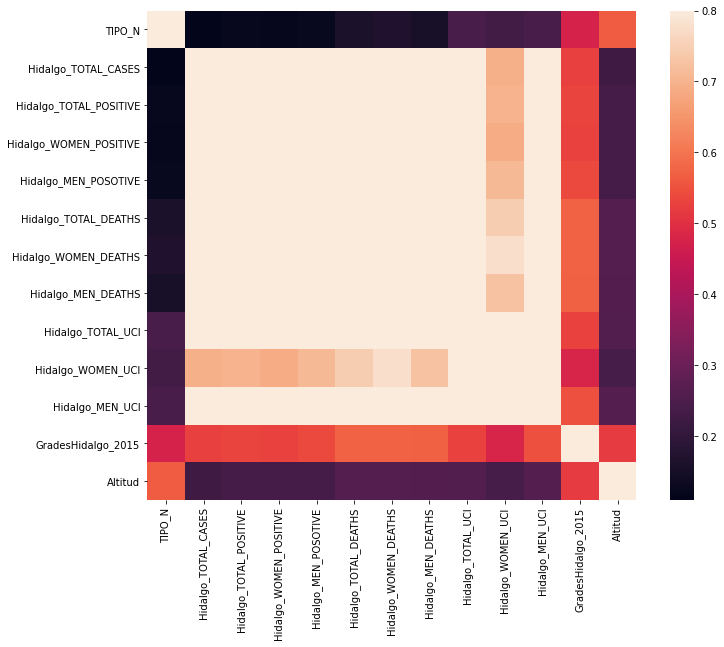

In [69]:
#correlation matrix all variables
corrmat = denue.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

f.savefig('C:/Users/almej/Desktop/climesgrades.png')

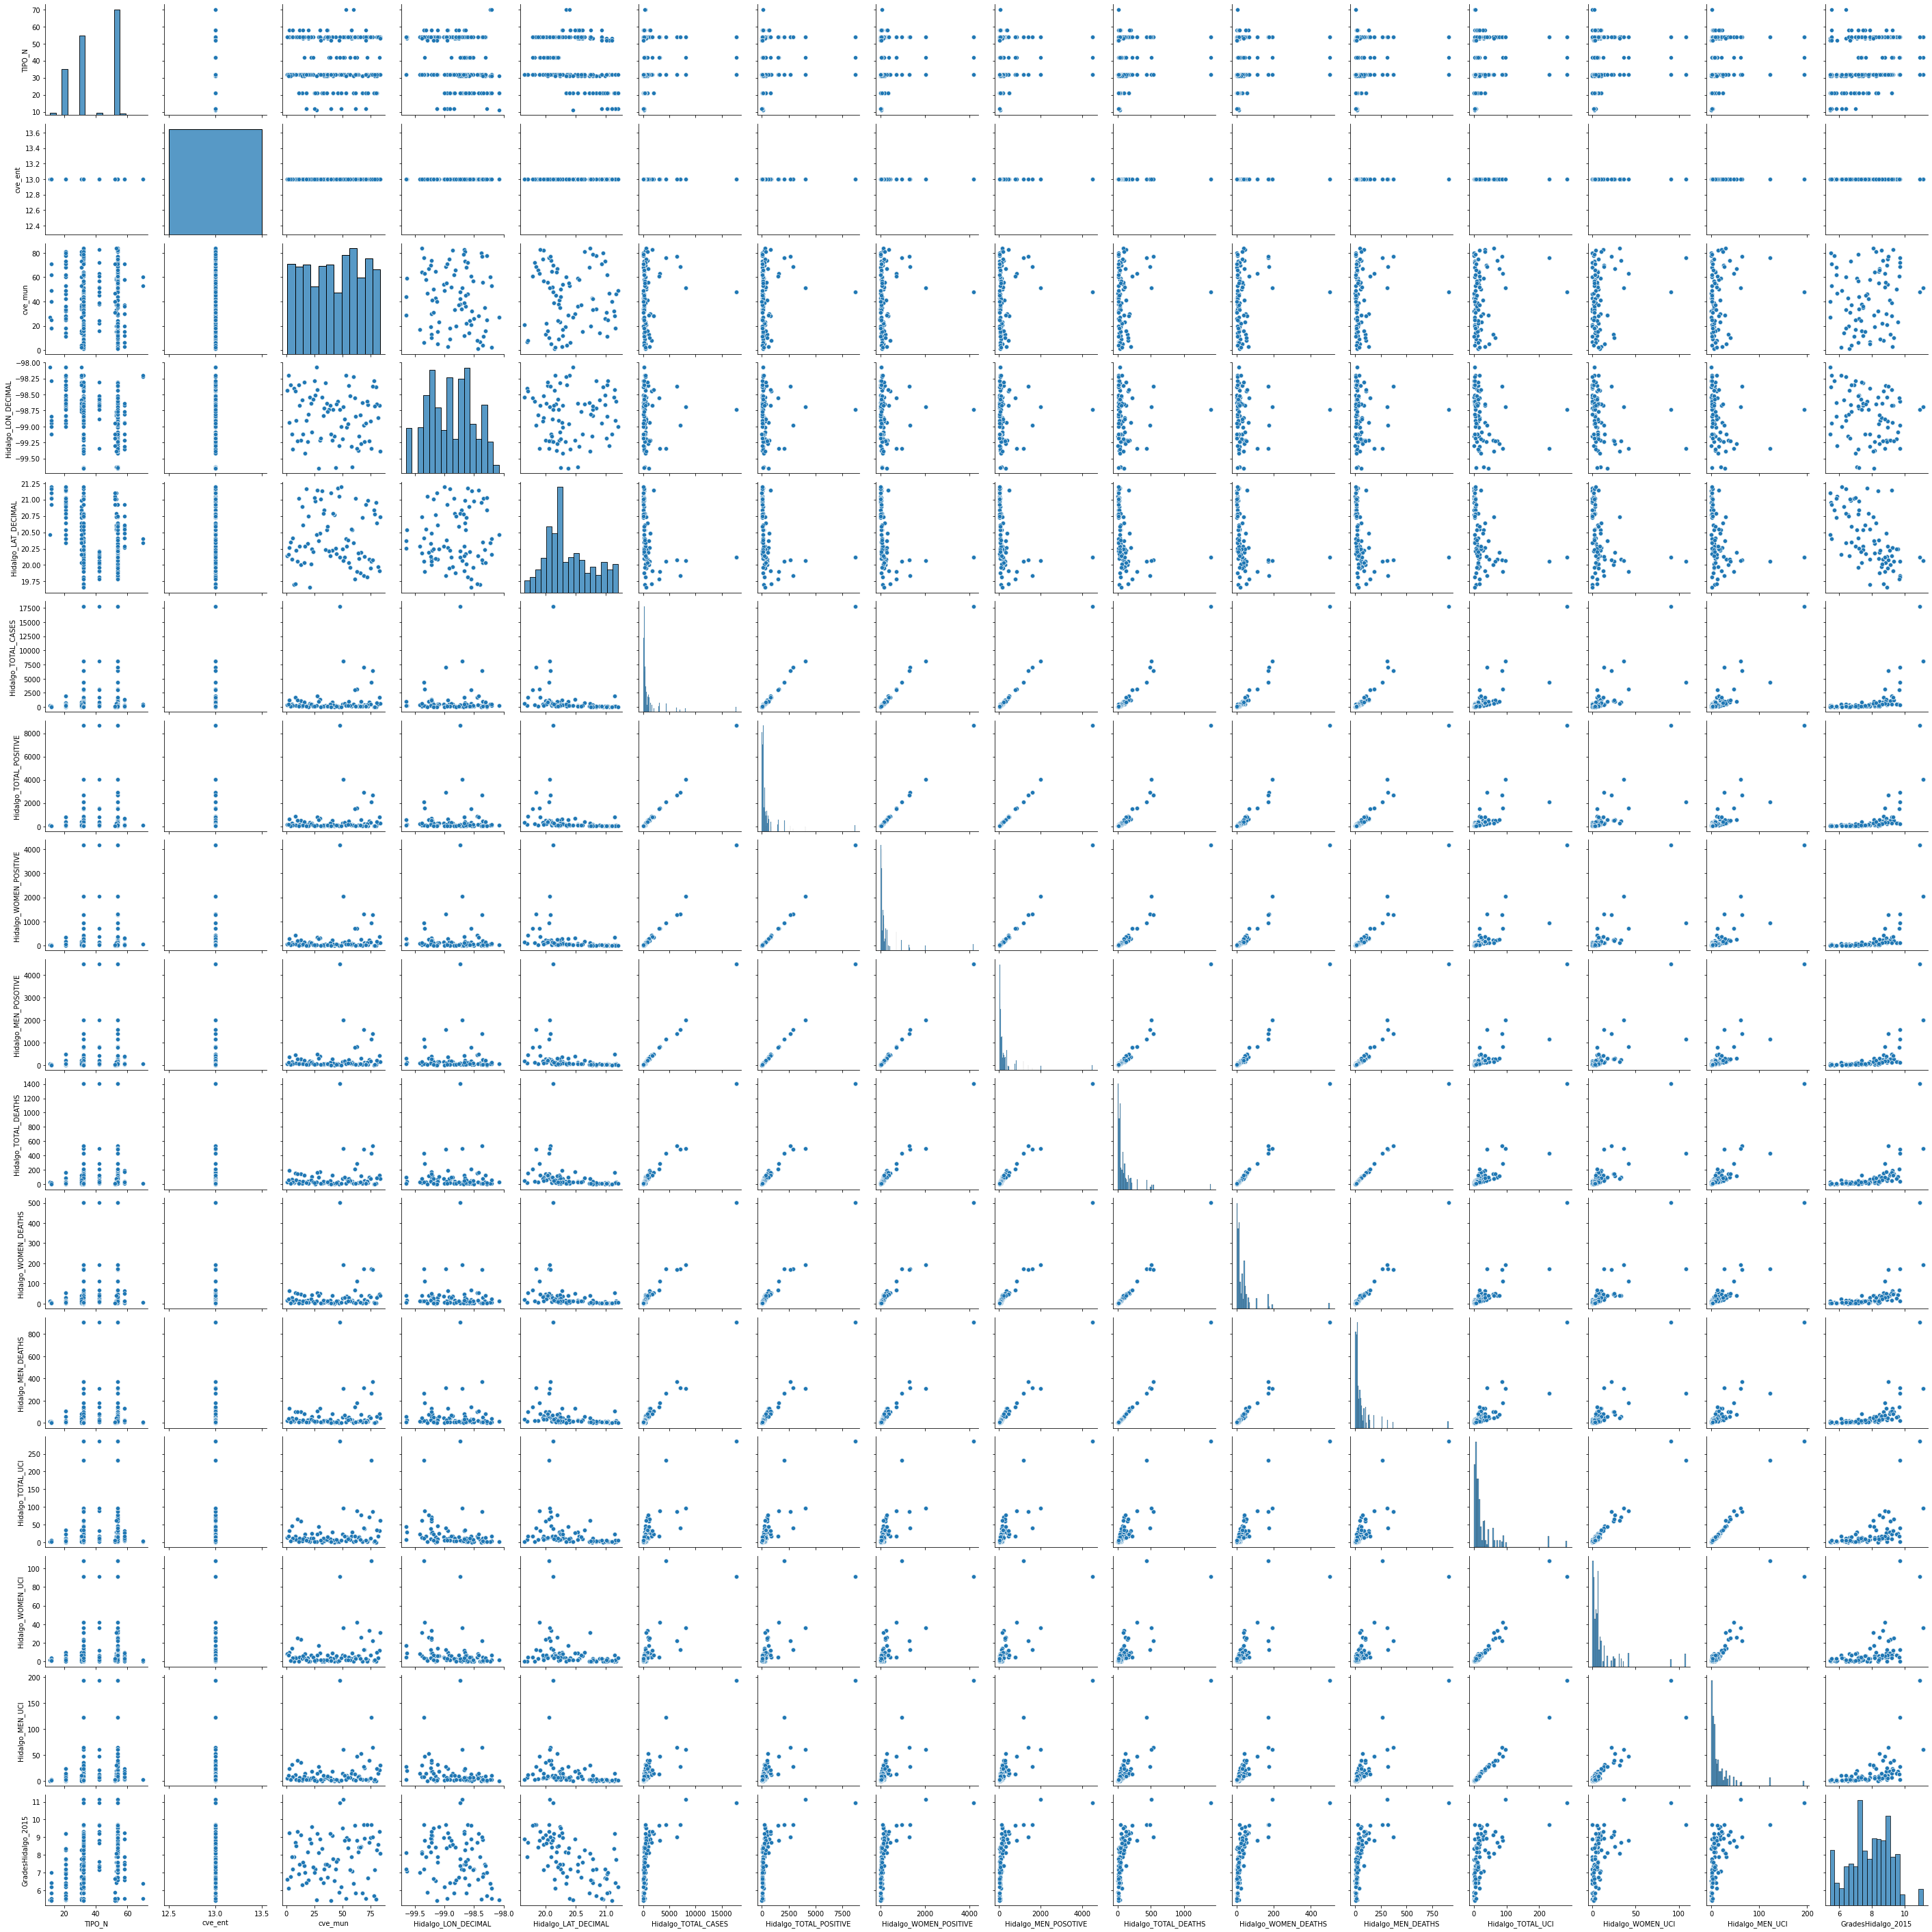

In [32]:
sns.pairplot(data=denue)

In [70]:
#variable dependiente duracion
corr = denue.corr()
print(corr)

                          TIPO_N  Hidalgo_TOTAL_CASES  Hidalgo_TOTAL_POSITIVE  \
TIPO_N                  1.000000             0.110011                0.121992   
Hidalgo_TOTAL_CASES     0.110011             1.000000                0.998052   
Hidalgo_TOTAL_POSITIVE  0.121992             0.998052                1.000000   
Hidalgo_WOMEN_POSITIVE  0.119988             0.996745                0.999469   
Hidalgo_MEN_POSOTIVE    0.123737             0.998316                0.999542   
Hidalgo_TOTAL_DEATHS    0.160278             0.985104                0.984534   
Hidalgo_WOMEN_DEATHS    0.167469             0.983972                0.984997   
Hidalgo_MEN_DEATHS      0.155811             0.982824                0.981370   
Hidalgo_TOTAL_UCI       0.242094             0.805911                0.811514   
Hidalgo_WOMEN_UCI       0.231896             0.693791                0.699383   
Hidalgo_MEN_UCI         0.242271             0.859030                0.864487   
GradesHidalgo_2015      0.47

In [121]:
X = summarize[['DefuncionesHgo_TotalCases', 'Educacion_Pob_Femenina', 'Educacion_Total De Viviendas Habitadas','DefuncionesHgo_Women','CasosUCIHgo_TotalCases']]
y = summarize['CasosGeneroHgo_TotalCases']